In [207]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [145]:
data = pd.read_csv('/kaggle/input/adult-census-income/adult.csv')

In [146]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [147]:
(data == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [148]:
data['workclass'].replace('?','IDK',inplace=True)

In [149]:
data['occupation'].replace('?','None',inplace=True)

In [150]:
data['native.country'].replace('?','We-Dont-Know',inplace=True)

In [151]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [152]:
need_dummie = ['workclass','marital.status','occupation','race','native.country']
need_label = ['relationship','sex','income']

In [153]:
data['education.num'].max()

16

In [154]:
data.drop('education',axis=1,inplace=True)

In [155]:
data['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [156]:
data['relationship'] = data['relationship'].apply(lambda x : 'Yes' if x == 'Wife' or x == 'Husband' else 'No')

data['relationshim'

In [157]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [158]:
def getdummie(data,columns):
    for col in  columns:
        dummie = pd.get_dummies(data[col])
        dummie = dummie.astype(np.float)
        data = pd.concat([data,dummie],axis=1)
        data.drop(col,axis=1,inplace=True)
    return data

In [159]:
def encoder(data,columns):
    encoder = LabelEncoder()
    for col in columns:
        data[col] = encoder.fit_transform(data[col])
        mappings = {index : label for index , label in enumerate(encoder.classes_)}
    return data
        

In [160]:
data = getdummie(data,need_dummie)

/tmp/ipykernel_32/4178232337.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dummie = dummie.astype(np.float)
/tmp/ipykernel_32/4178232337.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dummie = dummie.astype(np.float)
/tmp/ipykernel_32/4178232337.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`.

In [161]:
encoder(data,need_label)

,age,fnlwgt,education.num,relationship,sex,capital.gain,capital.loss,hours.per.week,income,Federal-gov,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,We-Dont-Know,Yugoslavia
0,90,77053,9,0,0,0,4356,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,82,132870,9,0,0,0,4356,18,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,66,186061,10,0,0,0,4356,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,54,140359,4,0,0,0,3900,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41,264663,10,0,0,0,3900,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32557,27,257302,12,1,0,0,0,38,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32558,40,154374,9,1,1,0,0,40,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32559,58,151910,9,0,0,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [162]:
#data = encoder(data,need_label)

In [163]:
data

,age,fnlwgt,education.num,relationship,sex,capital.gain,capital.loss,hours.per.week,income,Federal-gov,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,We-Dont-Know,Yugoslavia
0,90,77053,9,0,0,0,4356,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,82,132870,9,0,0,0,4356,18,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,66,186061,10,0,0,0,4356,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,54,140359,4,0,0,0,3900,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41,264663,10,0,0,0,3900,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32557,27,257302,12,1,0,0,0,38,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32558,40,154374,9,1,1,0,0,40,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32559,58,151910,9,0,0,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [164]:
data

,age,fnlwgt,education.num,relationship,sex,capital.gain,capital.loss,hours.per.week,income,Federal-gov,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,We-Dont-Know,Yugoslavia
0,90,77053,9,0,0,0,4356,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,82,132870,9,0,0,0,4356,18,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,66,186061,10,0,0,0,4356,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,54,140359,4,0,0,0,3900,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41,264663,10,0,0,0,3900,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32557,27,257302,12,1,0,0,0,38,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32558,40,154374,9,1,1,0,0,40,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32559,58,151910,9,0,0,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [165]:
Y = data['income']
X = data.drop('income',axis=1)

In [166]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [167]:
X

,age,fnlwgt,education.num,relationship,sex,capital.gain,capital.loss,hours.per.week,Federal-gov,IDK,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,We-Dont-Know,Yugoslavia
0,1.000000,0.043987,0.533333,0.0,0.0,0.0,1.000000,0.397959,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.890411,0.081896,0.533333,0.0,0.0,0.0,1.000000,0.173469,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.671233,0.118021,0.600000,0.0,0.0,0.0,1.000000,0.397959,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.506849,0.086982,0.200000,0.0,0.0,0.0,0.895317,0.397959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.328767,0.171404,0.600000,0.0,0.0,0.0,0.895317,0.397959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,0.600000,0.0,1.0,0.0,0.000000,0.397959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32557,0.136986,0.166404,0.733333,1.0,0.0,0.0,0.000000,0.377551,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32558,0.315068,0.096500,0.533333,1.0,1.0,0.0,0.000000,0.397959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32559,0.561644,0.094827,0.533333,0.0,0.0,0.0,0.000000,0.397959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [171]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,train_size = 0.75)

In [172]:
log_model = LogisticRegression()
log_model.fit(x_train , y_train )
log_model.score(x_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8473160545387545

In [228]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(86,))
model.add(tf.keras.layers.Dense(86,activation='relu'))
model.add(tf.keras.layers.Dense(86,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))


In [229]:
model.compile(
    optimizer = 'adam'
    ,loss = 'sparse_categorical_crossentropy'
    ,metrics=['accuracy']
)

In [251]:
epochs = 4
hist = model.fit(x_train,y_train,validation_split=0.35,batch_size=43,epochs=epochs)

Epoch 1/4
370/370 [==============================] - 1s 3ms/step - loss: 0.2950 - accuracy: 0.8632 - val_loss: 0.3191 - val_accuracy: 0.8563
Epoch 2/4
370/370 [==============================] - 1s 2ms/step - loss: 0.2927 - accuracy: 0.8630 - val_loss: 0.3207 - val_accuracy: 0.8550
Epoch 3/4
370/370 [==============================] - 1s 3ms/step - loss: 0.2904 - accuracy: 0.8660 - val_loss: 0.3237 - val_accuracy: 0.8547
Epoch 4/4
370/370 [==============================] - 1s 3ms/step - loss: 0.2887 - accuracy: 0.8665 - val_loss: 0.3206 - val_accuracy: 0.8573


In [252]:
loss = hist.history['loss']
vloss=hist.history['val_loss']
acc = hist.history['accuracy']
vacc = hist.history['val_accuracy']

In [253]:
np.argmin(vloss)

0

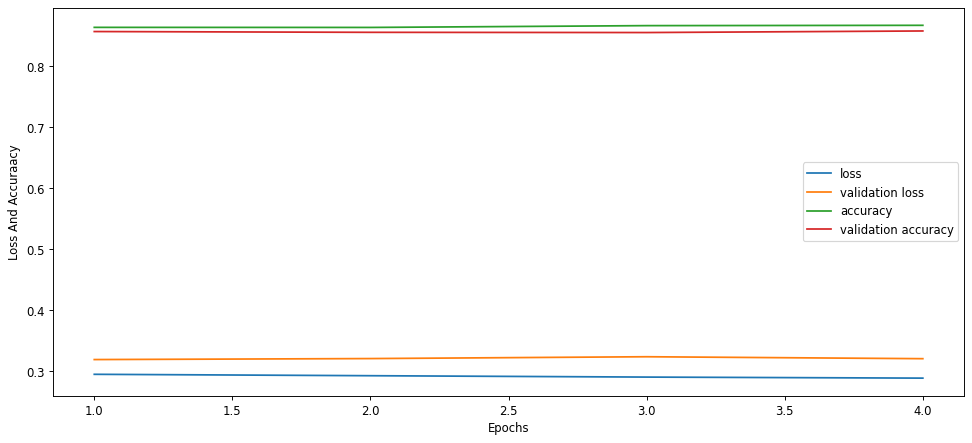

In [254]:
plt.figure(figsize = (14,6) , dpi=84)
plt.plot(range(1,epochs+1),loss,label='loss')
plt.plot(range(1,epochs+1),vloss,label='validation loss')
plt.plot(range(1,epochs+1),acc,label='accuracy')
plt.plot(range(1,epochs+1),vacc,label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss And Accuraacy')
plt.legend()
plt.show()

In [204]:
y_pred_log = log_model.predict(x_test)
y_pred_nn = model.predict(x_test)

255/255 [==============================] - 0s 1ms/step


10

In [218]:
print(f'score logistic regression : {log_model.score(x_test,y_test)} \n score neural network : {model.evaluate(x_test,y_test,verbose=0)[1]}')

score logistic regression : 0.8473160545387545 
 score neural network : 0.8406829833984375


In [226]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(86,))
model1.add(tf.keras.layers.Dense(86,activation='relu'))
model1.add(tf.keras.layers.Dense(86,activation='relu'))
model1.add(tf.keras.layers.Dense(1))
model1.compile(
    optimizer = 'adam'
    ,loss = 'categorical_crossentropy'
    ,metrics=['accuracy']
)

model1.fit(x_train,y_train,validation_split=0.2,batch_size=43,epochs=100)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


436/455 [===========================>..] - ETA: 0s - loss: 2.8683e-08 - accuracy: 0.7594

/opt/conda/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


455/455 [==============================] - 2s 3ms/step - loss: 2.8692e-08 - accuracy: 0.7593 - val_loss: 2.9265e-08 - val_accuracy: 0.7545
Epoch 2/100
455/455 [==============================] - 1s 2ms/step - loss: 2.8692e-08 - accuracy: 0.7593 - val_loss: 2.9265e-08 - val_accuracy: 0.7545
Epoch 3/100
455/455 [==============================] - 1s 3ms/step - loss: 2.8692e-08 - accuracy: 0.7593 - val_loss: 2.9265e-08 - val_accuracy: 0.7545
Epoch 4/100
455/455 [==============================] - 1s 2ms/step - loss: 2.8692e-08 - accuracy: 0.7593 - val_loss: 2.9265e-08 - val_accuracy: 0.7545
Epoch 5/100
455/455 [==============================] - 1s 2ms/step - loss: 2.8692e-08 - accuracy: 0.7593 - val_loss: 2.9265e-08 - val_accuracy: 0.7545
Epoch 6/100
455/455 [==============================] - 1s 2ms/step - loss: 2.8692e-08 - accuracy: 0.7593 - val_loss: 2.9265e-08 - val_accuracy: 0.7545
Epoch 7/100
455/455 [==============================] - 1s 3ms/step - loss: 2.8692e-08 - accuracy: 0.7593 -

KeyboardInterrupt: 

In [ ]:
model1.evaluate(x_test,y_test)